# Project Movielens


## Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

## Analysis Tasks to be performed:

Import the three datasets

Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

User Age Distribution

User rating of the movie “Toy Story”

Top 25 movies by viewership rating

Find the ratings for all the movies reviewed by for a particular user of user id = 2696
Feature Engineering:

In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Ratings.dat

In [3]:
ratings_col=['UserID','MovieID','Ratings','Timestamp']
ratings = pd.read_csv('ratings.dat',sep='::',header=None,names=ratings_col,engine='python')
ratings.head(3)

,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


# Loading Users.dat

In [4]:
user_col = ['UserID','Gender','Age','Occupation','Zipcode']
users = pd.read_csv('users.dat',sep='::',header=None,names = user_col,engine='python')
users.head(3)

,UserID,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


# Mapping Age and occupation codes 

In [5]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
users['age_group'] = pd.cut(users.Age, range(0, 81, 10), right=False, labels=labels)

In [6]:
users.head()

,UserID,Gender,Age,Occupation,Zipcode,age_group
0,1,F,1,10,48067,0-9
1,2,M,56,16,70072,50-59
2,3,M,25,15,55117,20-29
3,4,M,45,7,02460,40-49
4,5,M,25,20,55455,20-29


In [7]:
# Value Description 
occup_dic = {0: "other", 
             1 : "academic", 
             2: "artists",
             3: "Clerical/admin",
             4: "college/grad student",
             5: "customer service",
             6: "doctor/health care",
             7: "executive/managerial",
             8: "farmer",
             9: "homemaker",
             10: "K-12 student",
             11 : "lawyer",
             12 : "programer",
             13 : "retired",
             14  : "sales/marketing",
             15 : "scientist",
             16 : "self-employed",
             17 : "technician/engineer",
             18 : "tradesman/craftsman",
             19 : "unemployed",
             20 : "writer"
            } 



In [8]:
users['Occup_desc'] = users['Occupation'].apply(lambda x: occup_dic.get(x))

In [9]:
users.head()

,UserID,Gender,Age,Occupation,Zipcode,age_group,Occup_desc
0,1,F,1,10,48067,0-9,K-12 student
1,2,M,56,16,70072,50-59,self-employed
2,3,M,25,15,55117,20-29,scientist
3,4,M,45,7,02460,40-49,executive/managerial
4,5,M,25,20,55455,20-29,writer


# Loading movies.dat

In [10]:
movie_col= ['MovieID','Title','Genres']
movies = pd.read_csv('movies.dat',sep='::',header = None, names = movie_col,engine = 'python',index_col ='MovieID')
movies.head(3)

,Title,Genres
MovieID,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance


In [11]:

#pd.get_dummies(movies['Genres'])
movies_genre = movies['Genres'].str.get_dummies(sep='|')
movies = movies.merge(movies_genre,how='left',left_on='MovieID',right_on = 'MovieID')

In [12]:
movies.head(3)

,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


## Merging all the 3 data sets 

In [13]:
user_ratings = ratings.merge(users,how='left',on='UserID')

In [14]:
master_data = user_ratings.merge(movies,how='left',on='MovieID')
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 30 columns):
UserID         1000209 non-null int64
MovieID        1000209 non-null int64
Ratings        1000209 non-null int64
Timestamp      1000209 non-null int64
Gender         1000209 non-null object
Age            1000209 non-null int64
Occupation     1000209 non-null int64
Zipcode        1000209 non-null object
age_group      1000209 non-null category
Occup_desc     1000209 non-null object
Title          1000209 non-null object
Genres         1000209 non-null object
Action         1000209 non-null int64
Adventure      1000209 non-null int64
Animation      1000209 non-null int64
Children's     1000209 non-null int64
Comedy         1000209 non-null int64
Crime          1000209 non-null int64
Documentary    1000209 non-null int64
Drama          1000209 non-null int64
Fantasy        1000209 non-null int64
Film-Noir      1000209 non-null int64
Horror         1000209 non-null int64
Music

# Age Distribution of the reviewers    

Text(0.5, 1.0, 'Age Distribution of reviewers')

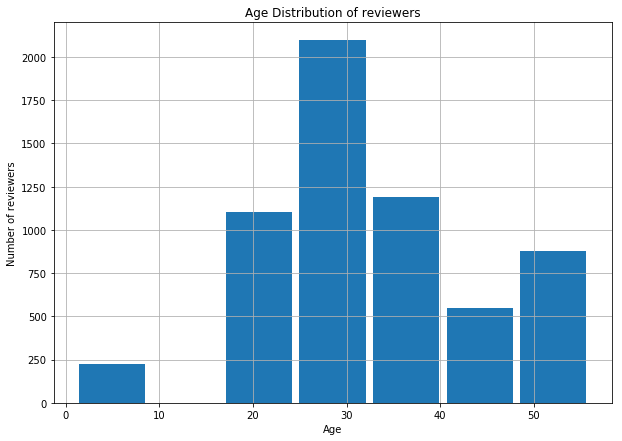

In [15]:
plt.figure(figsize=(10,7))
users['Age'].hist(bins=7,rwidth = 0.9)
plt.xlabel('Age')
plt.ylabel('Number of reviewers')
plt.title('Age Distribution of reviewers')

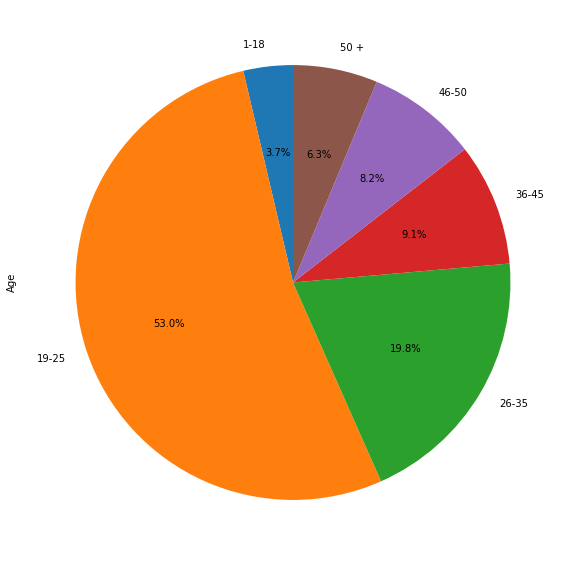

In [16]:
labels = ['1-18','19-25','26-35','36-45','46-50','50 +']
pd.cut(users.Age,[0,10,25,35,45,50,100],labels=labels).value_counts().sort_index().plot('pie',
                    startangle=90,autopct = '%1.1f%%',figsize=(20,10))


# lets find which age group had highest ratings

Text(0, 0.5, 'Ratings')

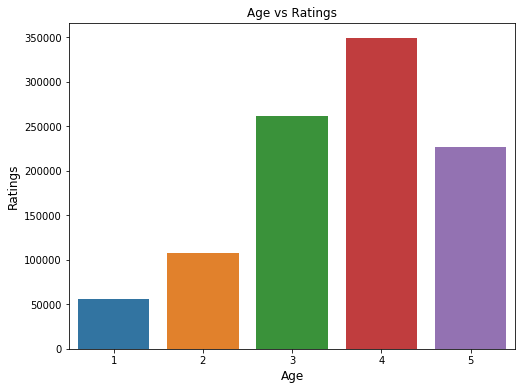

In [17]:
cols = ['Age','Ratings']
age_ratings = master_data[cols]
age_ratings = age_ratings['Ratings'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(age_ratings.index,age_ratings.values)
plt.title('Age vs Ratings')
plt.xlabel('Age',fontsize=12)
plt.ylabel('Ratings',fontsize=12)

# Toy Story Rating Analysis:

# The ratings for the movie 'Toy Story' has a averge of 4 to 5 stars 

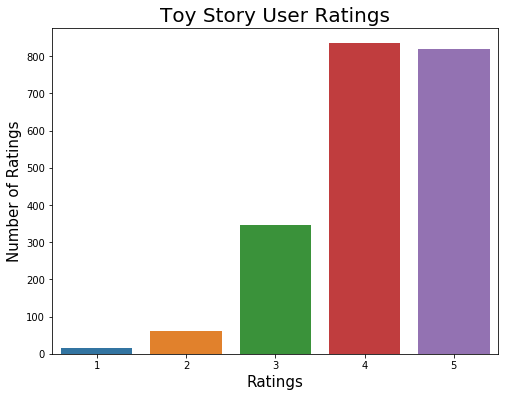

In [18]:
mask = master_data['Title']=='Toy Story (1995)'
toystory = master_data.loc[mask,'Ratings'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=toystory.index,y=toystory.values)
plt.xlabel('Ratings',fontsize=15)
plt.ylabel('Number of Ratings',fontsize =15)
plt.title('Toy Story User Ratings', fontsize = 20)
plt.show()

# Top 25 movies by viewership rating

Text(0.5, 1.0, 'Top 25 movies by Viewer ratings')

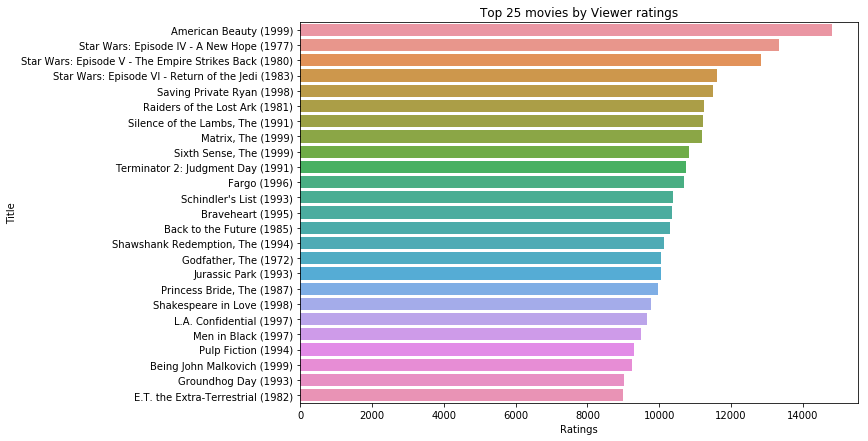

In [19]:
title = master_data.groupby('Title')
top25 = title.agg({'Ratings':'sum'}).sort_values('Ratings',ascending=False).head(25)
plt.figure(figsize=(10,7))
sns.barplot(x='Ratings',y=top25.index,data=top25)
plt.title('Top 25 movies by Viewer ratings')

# Find the ratings for all the movies reviewed 
# by a particular user of userid 2696

Text(0.5, 1.0, 'Movies Rated by User 2696')

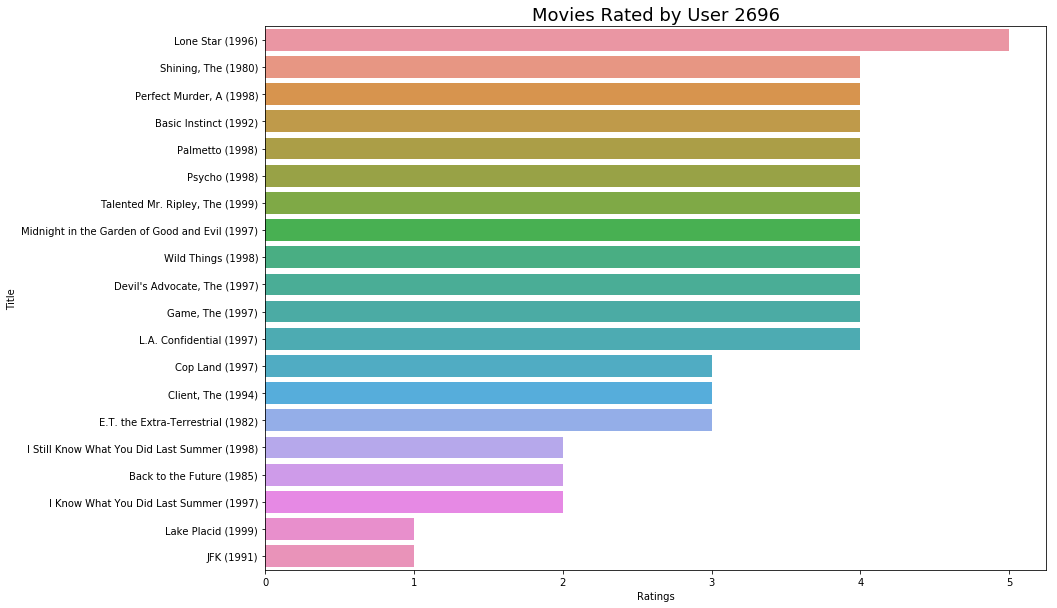

In [20]:
mask = master_data['UserID']==2696
user2696 = master_data.loc[mask,['Title','Ratings']].sort_values('Ratings',ascending=False)
plt.figure(figsize=(14,10))
sns.barplot(x='Ratings',y='Title',data=user2696,)
plt.title('Movies Rated by User 2696',fontsize=18)

# Unique Genres

In [21]:
unique_genre = pd.DataFrame(master_data['Genres'].str.split('|').tolist()).stack().unique()

In [22]:
unique_genre

array(['Drama', 'Animation', "Children's", 'Musical', 'Romance', 'Comedy',
       'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller',
       'Crime', 'Mystery', 'Western', 'Horror', 'Film-Noir',
       'Documentary'], dtype=object)

# Machine Learning

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# One hot coding for Gender to convert them to 0's and 1's

user_gender = pd.get_dummies(master_data['Gender'],prefix='Gender_')
master_data = pd.concat([master_data,user_gender],axis =1)


In [25]:
master_data.head(3)

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Occupation,Zipcode,age_group,Occup_desc,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender__F,Gender__M
0,1,1193,5,978300760,F,1,10,48067,0-9,K-12 student,...,0,0,0,0,0,0,0,0,1,0
1,1,661,3,978302109,F,1,10,48067,0-9,K-12 student,...,0,1,0,0,0,0,0,0,1,0
2,1,914,3,978301968,F,1,10,48067,0-9,K-12 student,...,0,1,0,1,0,0,0,0,1,0


In [26]:
X_cols = ['Gender__M','Gender__F','Age','Occupation','Fantasy', 'Sci-Fi', 'War', 'Thriller',
       'Crime', 'Mystery', 'Western', 'Horror', 'Film-Noir',
       'Documentary']

In [27]:
X= master_data[X_cols]
y= master_data['Ratings']

In [28]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [29]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((700146, 14), (300063, 14), (700146,), (300063,))

In [30]:
linear_model = LinearRegression()
linear_model.fit(X_train,X_test)
y_pred = linear_model.predict(y_train)

In [31]:
linear_model.coef_

array([-0.02346499,  0.02346499,  0.00470423,  0.00081395, -0.09863779,
       -0.11037874,  0.32006499,  0.00252912,  0.10276885,  0.02300565,
        0.04447071, -0.34528532,  0.45572245,  0.32844197])

In [32]:
linear_model.intercept_

3.4509378734619838

In [33]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.1007508324092443

## Using Logistics Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logreg = LogisticRegression()

In [36]:
logreg.fit(X_train,X_test)

C:\Users\shaha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shaha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
ypred= logreg.predict(y_train)

In [38]:
len(ypred)

300063

In [39]:
from sklearn import metrics

In [40]:
metrics.accuracy_score(y_test,ypred)

0.34914001393040794

## Using KNN Model

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(X_train,X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [43]:
ypred = knn.predict(y_train)

In [44]:
print(metrics.accuracy_score(y_test,ypred))

0.2739291415469418
